In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
INPUT_FILE_HTTP3 = 'curl_http3_results.csv'
INPUT_FILE_HTTP2 = 'curl_http2_results.csv'

In [32]:
df_http3 = pd.read_csv(INPUT_FILE_HTTP3).head(1000)
df_http3

,url,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,remote_ip,remote_port
0,https://www.google.com,0.025157,0.0,0.001089,0.029132,0.0,0.174951,0.178593,172.217.16.196,443
1,https://www.facebook.com,0.013462,0.0,0.000959,0.014599,0.0,0.144340,0.144399,157.240.251.35,443
2,https://www.youtube.com,0.042819,0.0,0.010791,0.045107,0.0,0.113004,0.211162,142.250.185.78,443
3,https://www.googleapis.com,0.020777,0.0,0.001414,0.022276,0.0,0.126458,0.126549,142.250.185.106,443
4,https://www.instagram.com,0.017906,0.0,0.001750,0.019409,0.0,0.170712,0.363936,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...
995,https://www.collider.com,0.109767,0.0,0.001112,0.111912,0.0,0.210754,0.210852,3.223.39.19,443
996,https://www.google.kg,0.018971,0.0,0.001145,0.020448,0.0,0.161555,0.163199,142.250.186.35,443
997,https://www.google.com.jm,0.018988,0.0,0.000917,0.020419,0.0,0.159363,0.163518,142.250.185.163,443
998,https://www.repocket.com,0.028569,0.0,0.016522,0.030403,0.0,0.039178,0.039262,172.67.139.50,443


In [33]:
df_http2 = pd.read_csv(INPUT_FILE_HTTP2)
df_http2

,url,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,remote_ip,remote_port
0,https://www.google.com,0.019560,0.005905,0.002110,0.019765,0.0,0.081241,0.082464,172.217.16.196,443
1,https://www.facebook.com,0.022552,0.007826,0.003246,0.023009,0.0,0.136764,0.136822,157.240.253.35,443
2,https://www.youtube.com,0.031584,0.008676,0.004785,0.031730,0.0,0.096695,0.197361,216.58.206.78,443
3,https://www.googleapis.com,0.018611,0.006029,0.001794,0.018772,0.0,0.122874,0.122950,142.250.74.202,443
4,https://www.instagram.com,0.013110,0.005455,0.001294,0.013254,0.0,0.169643,0.371481,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...
995,https://www.collider.com,0.208717,0.104169,0.001454,0.208897,0.0,0.318439,0.318553,3.223.39.19,443
996,https://www.google.kg,0.021820,0.005513,0.001731,0.022281,0.0,0.219518,0.224054,142.250.186.35,443
997,https://www.google.com.jm,0.019007,0.007023,0.002980,0.019261,0.0,0.226611,0.233285,216.58.206.35,443
998,https://www.repocket.com,0.020195,0.011979,0.007426,0.020352,0.0,0.031581,0.031749,104.21.87.17,443


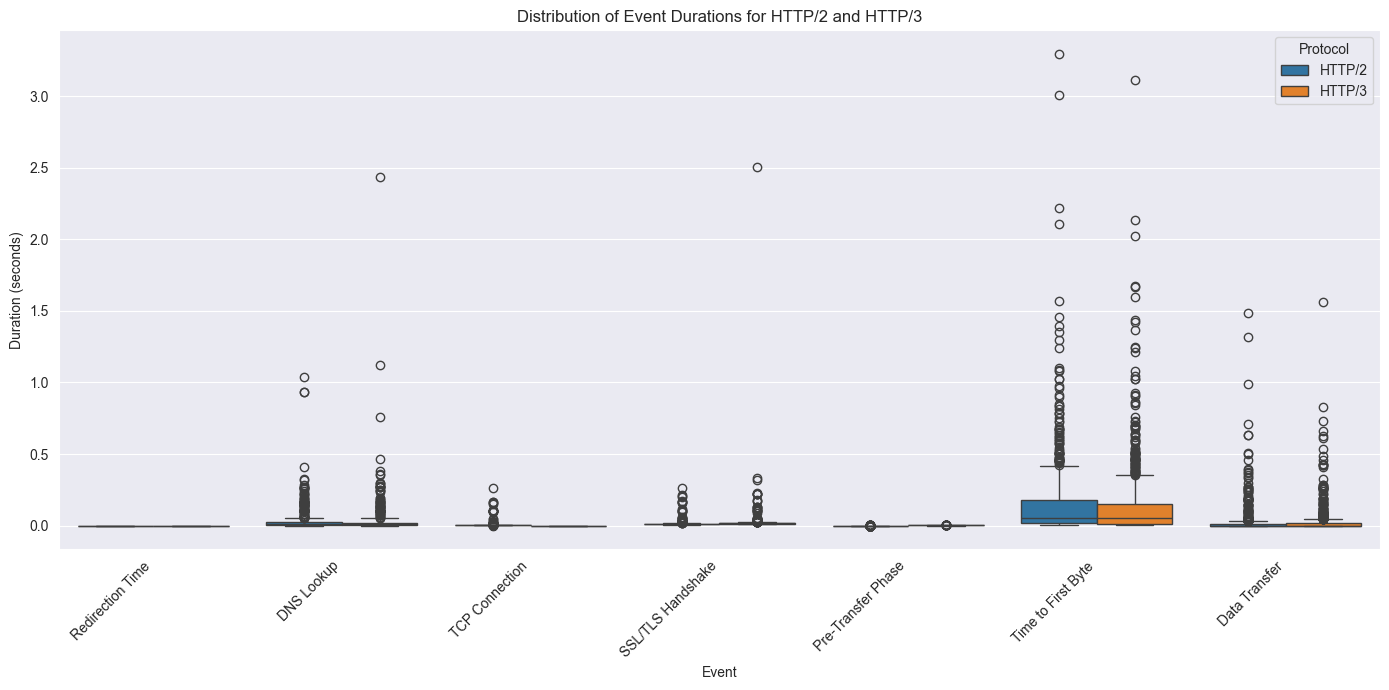

In [34]:
df_http3['duration_redirection'] = df_http3['time_redirect']
df_http3['duration_dns_lookup'] = df_http3['time_namelookup'] - df_http3['time_redirect']
df_http3['duration_tcp_connection'] = 0  # No TCP connection time for HTTP/3 over QUIC
df_http3['duration_ssl_handshake'] = df_http3['time_appconnect'] - df_http3['time_namelookup']  # Adjusted
df_http3['duration_pre_transfer'] = df_http3['time_pretransfer'] - df_http3['time_appconnect']
df_http3['duration_ttfb'] = df_http3['time_starttransfer'] - df_http3['time_pretransfer']
df_http3['duration_data_transfer'] = df_http3['time_total'] - df_http3['time_starttransfer']

df_http2['duration_redirection'] = df_http2['time_redirect']
df_http2['duration_dns_lookup'] = df_http2['time_namelookup'] - df_http2['time_redirect']
df_http2['duration_tcp_connection'] = df_http2['time_connect'] - df_http2['time_namelookup']
df_http2['duration_ssl_handshake'] = df_http2['time_appconnect'] - df_http2['time_connect']
df_http2['duration_pre_transfer'] = df_http2['time_pretransfer'] - df_http2['time_appconnect']
df_http2['duration_ttfb'] = df_http2['time_starttransfer'] - df_http2['time_pretransfer']
df_http2['duration_data_transfer'] = df_http2['time_total'] - df_http2['time_starttransfer']

duration_columns = [
    'duration_redirection',
    'duration_dns_lookup',
    'duration_tcp_connection',
    'duration_ssl_handshake',
    'duration_pre_transfer',
    'duration_ttfb',
    'duration_data_transfer'
]

durations_http3 = df_http3[duration_columns]
durations_http2 = df_http2[duration_columns]

durations_melted_http3 = durations_http3.melt(var_name='Event', value_name='Duration')
durations_melted_http3['Protocol'] = 'HTTP/3'

durations_melted_http2 = durations_http2.melt(var_name='Event', value_name='Duration')
durations_melted_http2['Protocol'] = 'HTTP/2'

durations_melted = pd.concat([durations_melted_http2, durations_melted_http3], ignore_index=True)

event_labels = {
    'duration_redirection': 'Redirection Time',
    'duration_dns_lookup': 'DNS Lookup',
    'duration_tcp_connection': 'TCP Connection',
    'duration_ssl_handshake': 'SSL/TLS Handshake',
    'duration_pre_transfer': 'Pre-Transfer Phase',
    'duration_ttfb': 'Time to First Byte',
    'duration_data_transfer': 'Data Transfer'
}

durations_melted['Event'] = durations_melted['Event'].map(event_labels)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Event', y='Duration', hue='Protocol', data=durations_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Event Durations for HTTP/2 and HTTP/3')
plt.legend(title='Protocol')
plt.tight_layout()
plt.show()

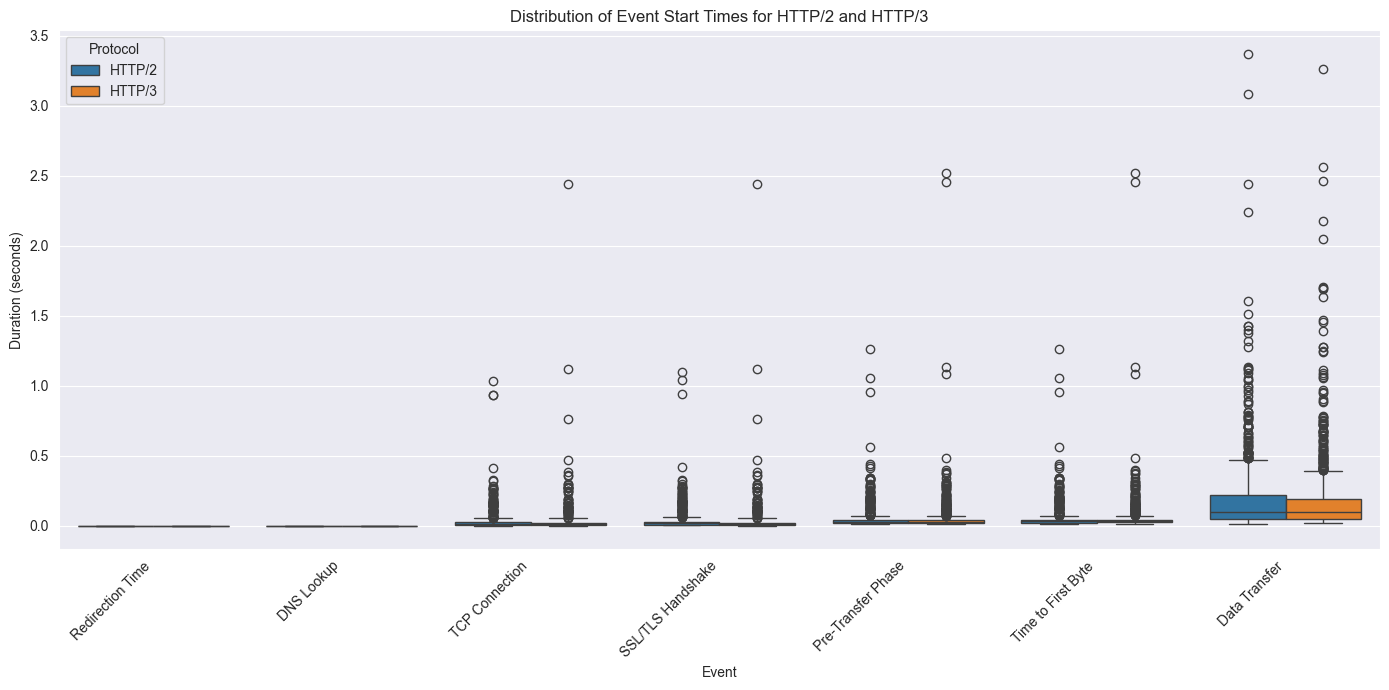

In [35]:
df_http3['start_redirection'] = 0
df_http3['start_dns_lookup'] = df_http3['time_redirect']
df_http3['start_tcp_connection'] = df_http3['time_namelookup']
df_http3['start_ssl_handshake'] = df_http3['time_namelookup']  # Adjusted for QUIC
df_http3['start_pre_transfer'] = df_http3['time_appconnect']
df_http3['start_ttfb'] = df_http3['time_pretransfer']
df_http3['start_data_transfer'] = df_http3['time_starttransfer']

df_http2['start_redirection'] = 0
df_http2['start_dns_lookup'] = df_http2['time_redirect']
df_http2['start_tcp_connection'] = df_http2['time_namelookup']
df_http2['start_ssl_handshake'] = df_http2['time_connect']
df_http2['start_pre_transfer'] = df_http2['time_appconnect']
df_http2['start_ttfb'] = df_http2['time_pretransfer']
df_http2['start_data_transfer'] = df_http2['time_starttransfer']

start_time_columns = [
    'start_redirection',
    'start_dns_lookup',
    'start_tcp_connection',
    'start_ssl_handshake',
    'start_pre_transfer',
    'start_ttfb',
    'start_data_transfer'
]

# Melt and add Protocol column
start_times_http3 = df_http3[start_time_columns]
start_times_melted_http3 = start_times_http3.melt(var_name='Event', value_name='Start Time')
start_times_melted_http3['Protocol'] = 'HTTP/3'

start_times_http2 = df_http2[start_time_columns]
start_times_melted_http2 = start_times_http2.melt(var_name='Event', value_name='Start Time')
start_times_melted_http2['Protocol'] = 'HTTP/2'

start_times_melted = pd.concat([start_times_melted_http2, start_times_melted_http3], ignore_index=True)

event_labels = {
    'start_redirection': 'Redirection Time',
    'start_dns_lookup': 'DNS Lookup',
    'start_tcp_connection': 'TCP Connection',
    'start_ssl_handshake': 'SSL/TLS Handshake',
    'start_pre_transfer': 'Pre-Transfer Phase',
    'start_ttfb': 'Time to First Byte',
    'start_data_transfer': 'Data Transfer'
}

start_times_melted['Event'] = start_times_melted['Event'].map(event_labels)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Event', y='Start Time', hue='Protocol', data=start_times_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Event Start Times for HTTP/2 and HTTP/3')
plt.legend(title='Protocol')
plt.tight_layout()
plt.show()


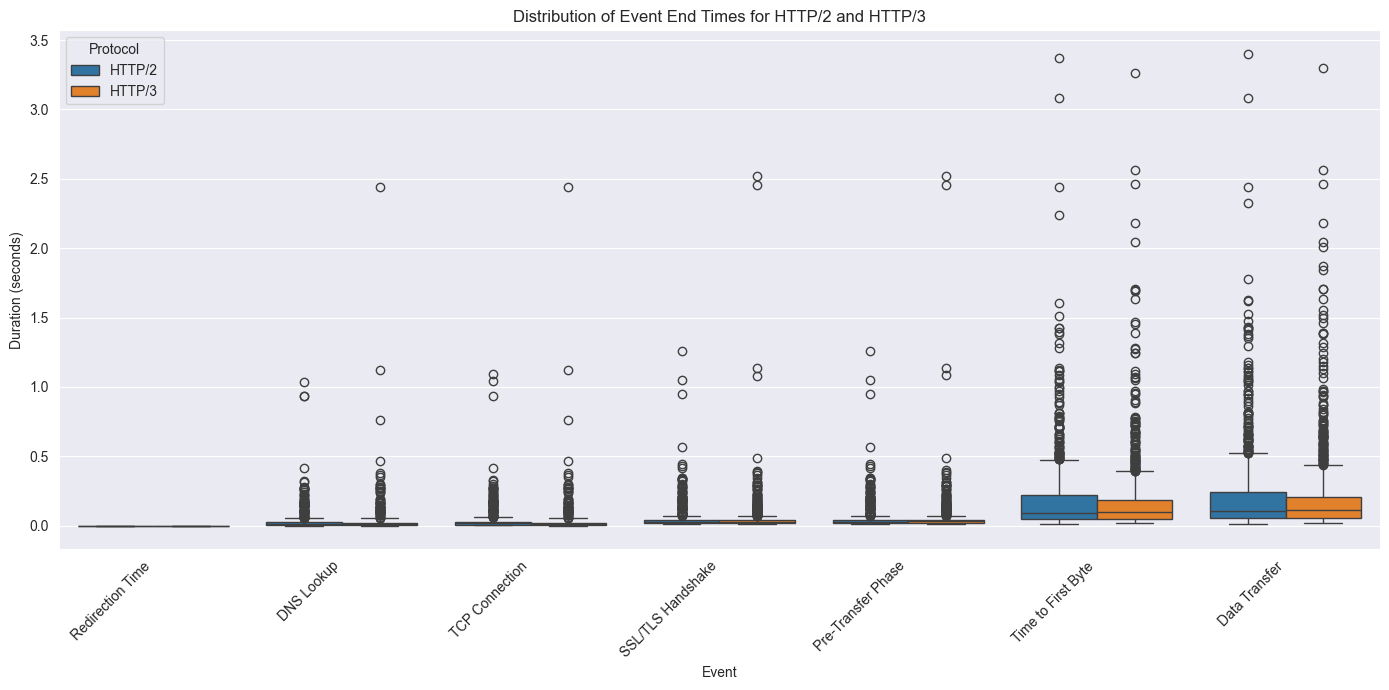

In [36]:
df_http3['end_redirection'] = df_http3['time_redirect']
df_http3['end_dns_lookup'] = df_http3['time_namelookup']
df_http3['end_tcp_connection'] = df_http3['time_namelookup']  # Since duration is zero
df_http3['end_ssl_handshake'] = df_http3['time_appconnect']
df_http3['end_pre_transfer'] = df_http3['time_pretransfer']
df_http3['end_ttfb'] = df_http3['time_starttransfer']
df_http3['end_data_transfer'] = df_http3['time_total']

df_http2['end_redirection'] = df_http2['time_redirect']
df_http2['end_dns_lookup'] = df_http2['time_namelookup']
df_http2['end_tcp_connection'] = df_http2['time_connect']
df_http2['end_ssl_handshake'] = df_http2['time_appconnect']
df_http2['end_pre_transfer'] = df_http2['time_pretransfer']
df_http2['end_ttfb'] = df_http2['time_starttransfer']
df_http2['end_data_transfer'] = df_http2['time_total']

end_time_columns = [
    'end_redirection',
    'end_dns_lookup',
    'end_tcp_connection',
    'end_ssl_handshake',
    'end_pre_transfer',
    'end_ttfb',
    'end_data_transfer'
]

# Melt and add Protocol column
end_times_http3 = df_http3[end_time_columns]
end_times_melted_http3 = end_times_http3.melt(var_name='Event', value_name='End Time')
end_times_melted_http3['Protocol'] = 'HTTP/3'

end_times_http2 = df_http2[end_time_columns]
end_times_melted_http2 = end_times_http2.melt(var_name='Event', value_name='End Time')
end_times_melted_http2['Protocol'] = 'HTTP/2'

end_times_melted = pd.concat([end_times_melted_http2, end_times_melted_http3], ignore_index=True)

event_labels = {
    'end_redirection': 'Redirection Time',
    'end_dns_lookup': 'DNS Lookup',
    'end_tcp_connection': 'TCP Connection',
    'end_ssl_handshake': 'SSL/TLS Handshake',
    'end_pre_transfer': 'Pre-Transfer Phase',
    'end_ttfb': 'Time to First Byte',
    'end_data_transfer': 'Data Transfer'
}

end_times_melted['Event'] = end_times_melted['Event'].map(event_labels)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Event', y='End Time', hue='Protocol', data=end_times_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Event End Times for HTTP/2 and HTTP/3')
plt.legend(title='Protocol')
plt.tight_layout()
plt.show()